In [66]:
import pandas as pd

In [67]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [68]:
housing_data = pd.read_csv('./melb_data.csv')
housing_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [69]:
housing_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [70]:
housing_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [71]:
y = housing_data['Price']

In [72]:
y.head()

0    1480000.0
1    1035000.0
2    1465000.0
3     850000.0
4    1600000.0
Name: Price, dtype: float64

In [73]:
feature_names = ['Rooms', 'Bedroom2', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

In [74]:
x = housing_data[feature_names]

In [75]:
x.head()

,Rooms,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude
0,2,2.0,1.0,202.0,-37.7996,144.9984
1,2,2.0,1.0,156.0,-37.8079,144.9934
2,3,3.0,2.0,134.0,-37.8093,144.9944
3,3,3.0,2.0,94.0,-37.7969,144.9969
4,4,3.0,1.0,120.0,-37.8072,144.9941


In [76]:
x.describe()

,Rooms,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude
count,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,2.914728,1.534242,558.416127,-37.809203,144.995216
std,0.955748,0.965921,0.691712,3990.669241,0.079260,0.103916
min,1.000000,0.000000,0.000000,0.000000,-38.182550,144.431810
25%,2.000000,2.000000,1.000000,177.000000,-37.856822,144.929600
50%,3.000000,3.000000,1.000000,440.000000,-37.802355,145.000100
75%,3.000000,3.000000,2.000000,651.000000,-37.756400,145.058305
max,10.000000,20.000000,8.000000,433014.000000,-37.408530,145.526350


In [77]:
def get_mae(max_leaf_nodes: int, train_x, val_x, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_x, train_y)
    predictions = model.predict(val_x)
    mae = mean_absolute_error(predictions, val_y)
    return mae

best # of max_leaf_nodes = 730, with score = 210235.56


Text(0, 0.5, 'Mean absolute error')

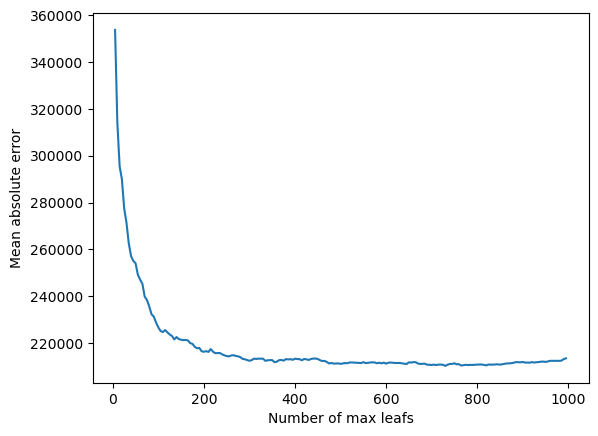

In [91]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

train_x, val_x, train_y, val_y = train_test_split(x, y)

nodes = [x for x in range(5, 1000, 5)]

node_y = [get_mae(x, train_x, val_x, train_y, val_y) for x in nodes]

best_nodes = node_y.index(min(node_y))
print('best # of max_leaf_nodes = {}, with score = {}'.format(nodes[best_nodes], round(node_y[best_nodes], 2)))

plt.plot(nodes, node_y)
plt.xlabel("Number of max leafs")
plt.ylabel("Mean absolute error")